# Guide to the notebook

## Interface

- There is a console on the left to create cells temporarily for testing purpose. You can toggle it by click the **Console** button on the top toolbar.
- Click a cell and press **Ctrl-Enter** or **Cmd-Enter** will execute the commands in cell
- If you get an unexpected result try to rerun the cell

# Exercise 1 - Genome-Wide Association study (GWAS)

This exercise is about Genome-Wide Association Studies (GWAS): how to perform one and some pitfalls to look out for. 

It will be conducted from the command line (bash terminal) using the program PLINK2 and using R for visualization. 

For a detailed description of the Plink program click [here (original program)](http://zzz.bwh.harvard.edu/plink/) and [here (updated version of the program)](https://www.cog-genomics.org/plink/1.9/).

The exercise will be carried out at the linux server via this notebook. This notebook consist of blocks that are either text (like this block), a bash terminal in linux with some code (says "Bash" in the upper right corner) or an R terminal with some code (says R in the upper right corner).
To execute the Bash and R code click on the relevant block with your mouse and then type Ctrl-Enter (hold down control bottom and then press enter). NB if you are a mac user you should instead type cmd-Enter. 

You can change the code and then run again with Ctrl-Enter (Cmd-Enter on mac computers). 




## Preparation - copy the data to your folder


First, list the content of your home folder. You do this in Bash by running the commands below. Click the box and run the commmand (Crtl-Enter on windows/linux, Cmd-Enter on Mac). First run might give you an error; just ignore that and rerun:

In [ ]:
# this is a comment. Comments starts with a # and the text is not run as code.

# command to go to your home
cd ~/

# command to view all the files and folders in your home
ls

Now download a compressed version of the data that we will be analyzing today. You can do this with the following commands

In [ ]:
# copy data to your folder
cp /course/novo23/gwas/GWASex.tar.gz .
# view all files in folder
ls

Next uncompress the files and list the content of the folder to see what files appeared:

In [ ]:
# uncompress the files
tar -xf GWASex.tar.gz

# view all files in folder
ls

Your folder should now contain a subfolder called data, containing the all files you will use in this exercise.

Some of the files are data files, but note that the folder also contain a file called plink.plot.R, which contain R code for plotting your results.

List the content of the data folder

In [4]:
ls data/

gwa.bed  gwa.bim  gwa.fam  pheno3.txt  pheno.txt  plink.plot.R


## Exercise A: running your first GWAS

Briefly, the GWAS data consist of SNP genotyping data from 356 individuals of which some have a certain disease (cases) and the rest do not (controls).

To make sure the GWAS analyses will run fast the main data file (gwa.bed) is in a binary format, which is not very reader friendly. 

However, PLINK (the program we will use to run the analyses) will print summary statistics about the data (number of SNPs, number of individuals, number of cases, number of controls etc) to the screen when you run an analysis.

Also, there are two additional data files, gwa.bim and gwa.fam, which are not in binary format and which contains information about the SNPs in the data and the individuals in the data, respectively. 

(You can read more about the data format in the manuals linked to above - but for now this is all you need to know).

Let's look inside the .fam file, which contains information about the individuals. The head and tail commands shows the first and last 10 lines of the file. Try to run them:

In [5]:
#head prints the 10 lines
head data/gwa.fam
#tail prints the last 10 lines
tail data/gwa.fam

case1 1 0 0 1 2
case2 1 0 0 1 2
case3 1 0 0 2 2
case4 1 0 0 2 2
case5 1 0 0 2 2
case6 1 0 0 1 2
case7 1 0 0 2 2
case8 1 0 0 2 2
case9 1 0 0 2 2
case10 1 0 0 2 2
control191 1 0 0 2 1
control192 1 0 0 2 1
control193 1 0 0 2 1
control194 1 0 0 2 1
control195 1 0 0 2 1
control196 1 0 0 2 1
control197 1 0 0 2 1
control198 1 0 0 2 1
control199 1 0 0 2 1
control200 1 0 0 2 1


Let's try to perform a GWAS of our data, i.e. test each SNP for association with the disease.

And let's try to do it using logistic regression for case-control data

The PLINK option "--bfile data/gwa"" will specify that the data PLINK should analyse are the files in folder called "data" with the prefix "gwa".

"—logistic" specifies that we want to perform GWAS using logistic regressoin

"—adjust" tells PLINK to output a file that includes p-values that are adjusted for multiple testing using Bonferroni correction as well as other fancier methods.

"—autosome" only use autosomes and not X,Y,MT


Now perform the logistic regression on all the SNPs int the dataset using these options in PLINK by typing:

In [6]:
plink  --bfile data/gwa --logistic --adjust --autosome

PLINK v1.90b6 64-bit (26 May 2018)             www.cog-genomics.org/plink/1.9/
(C) 2005-2018 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --adjust
  --autosome
  --bfile data/gwa
  --logistic

386829 MB RAM detected; reserving 193414 MB for main workspace.
488756 out of 499264 variants loaded from .bim file.
356 people (145 males, 211 females) loaded from .fam.
356 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 356 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.964498.
488756 variants and 356 people pass filters and QC.
Among remaining phenotypes, 156 are cases and 200 are controls.
Writing logistic model association res

Take a look at the text PLINK prints to your screen. Specifically, note the

 - number of SNPs

 - number of individuals

 - number of cases and controls
 


Next, plot the results of the GWAS using the following command run in R



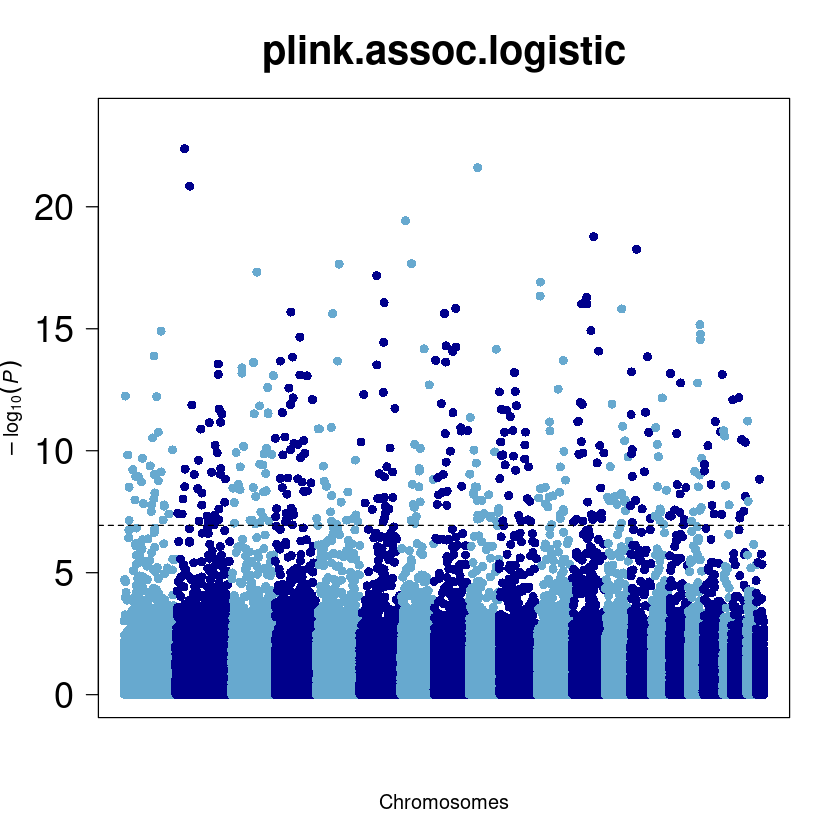

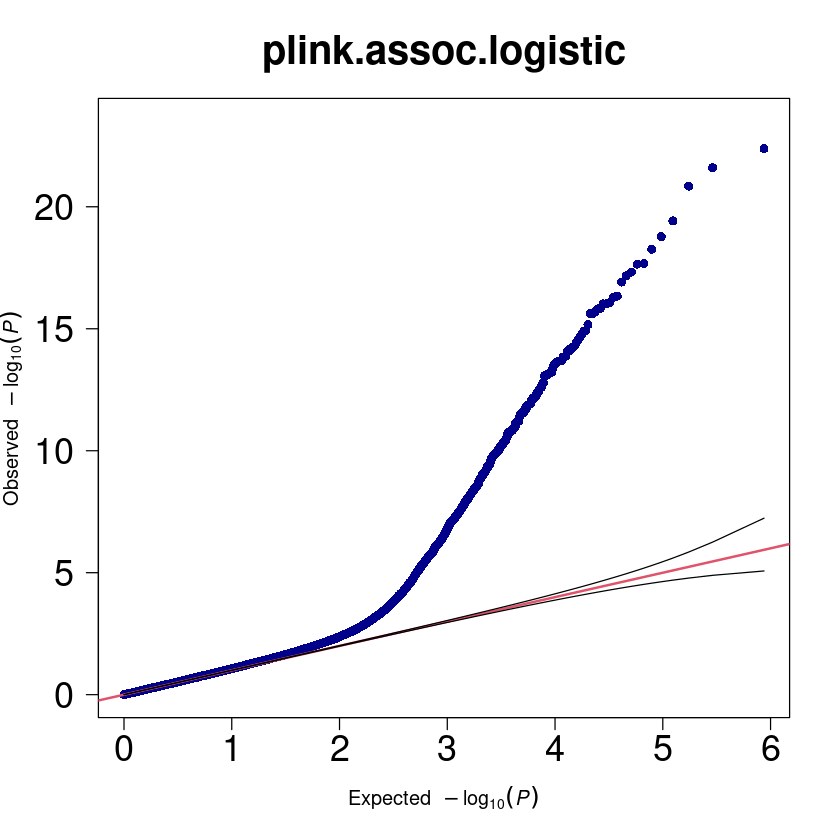

In [8]:
# source R function for plotting
source("/course/novo23/scripts/newPlotPlink.R")

# plot the results (plink.assoc.logistic is the output file from plink)
plotPlink("~/plink.assoc.logistic")

This should give you several plots. If nothing shows up, rerun the cell.

For now just look at the Manhattan plot (the first plot). A bonferroni corrected p-value threshold based on an initial p-value threshold of 0.05 is shown as a dotted line on the plot. Explain how this threshold was reached and calculate the exact threshold using your knowledge of how many SNPs you have in your dataset (NB if you want to calculate log10 in R you can use the function log10).

You can perform calculations by changing the R code below (and running it by typing Ctrl-enter as before).

In [2]:
## change the code for your calculations (random numbers showed)

0.05 / 448000

[1] 1.116071e-07


- Using this threshold, does any of the SNPs in your dataset seem to be associated with the disease?

- Do your results seem plausible? Why/why not?


## Exercise B: checking if it went OK using QQ-plot

Now look at the QQ-plot that you already generated (second plot above). Here the red line is the x=y line and the thin curves are a confidence band.

- What does this plot suggest and why?





## Exercise C: QC your data

As you can see, a lot can go wrong if you do not check the quality of your data before running your GWAS! So if you want meaningful/useful output you always have to run a lot of quality checks (QC) before running the association tests. Will will try to go through some useful QC steps now.

One potential problem in association studies is spurious relatedness, where some of the individuals in the sample are closely related. Closely related individuals can be inferred with PLINK using the following command, which only uses autosomal SNPs with a minor allele frequency > 5%:



In [10]:
plink  --bfile data/gwa --genome --autosome --maf 0.05

PLINK v1.90b6 64-bit (26 May 2018)             www.cog-genomics.org/plink/1.9/
(C) 2005-2018 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --autosome
  --bfile data/gwa
  --genome
  --maf 0.05

386829 MB RAM detected; reserving 193414 MB for main workspace.
488756 out of 499264 variants loaded from .bim file.
356 people (145 males, 211 females) loaded from .fam.
356 phenotype values loaded from .fam.
Using up to 87 threads (change this with --threads).
Before main variant filters, 356 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.964498.
111253 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).
377503 variants and 356 people pass filters and QC.
Among remaini

The results can be summarised in a plot with the following R code and gives the names of potential related pairs: 

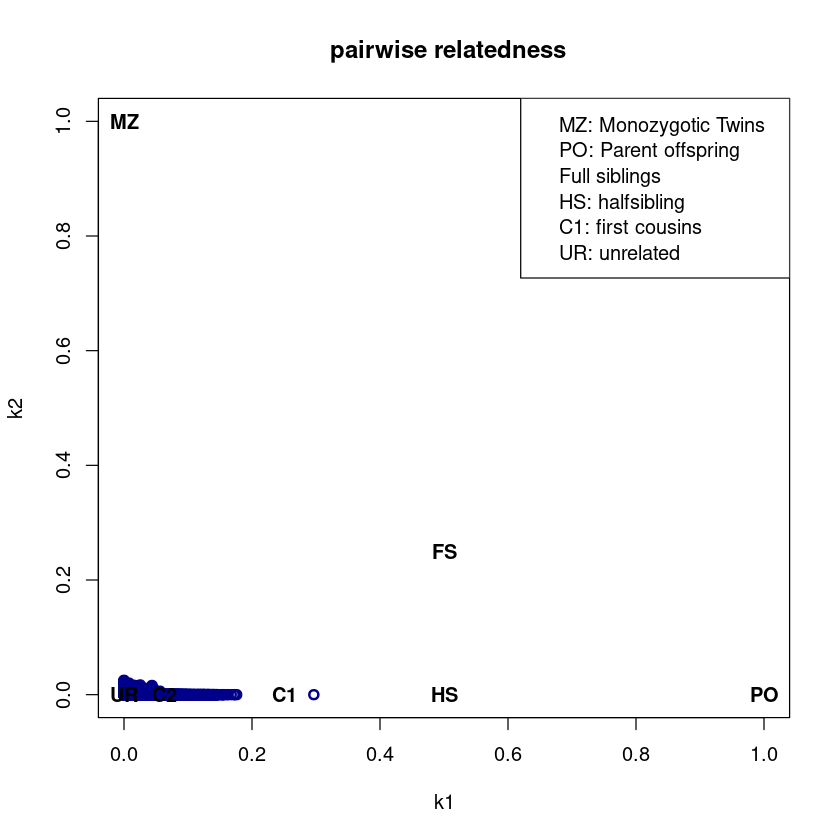

In [11]:
# source R function for plotting
source("/course/novo23/scripts/newPlotPlink.R")

# plot the results (plink.genome is the output file from plink)
plotPlink("~/plink.genome")


The figure shows estimates of the relatedness for all pairs of individuals.

For each pair k1 is the proportion of the genome where the pair shares 1 of their alleles identical-by-descent (IBD) and k2 is the proportion of the genome where the pair shares both their alleles IBD.

- The expected (k1,k2) values for simple relationships are shown in the figure. Are any of the individuals in your dataset closely related?

- What assumption in association studies is violated when individuals are related? 

- And last but not least: how would you recognize if the same person is included twice? (this actually happens often!)


We usually only remove 1. or 2. degree relatives (MZ,PO,FS,HS) from the analysis or we use a mixed model to take the relatedness into account. 

Principal component analysis (PCA) and a very similar methods called multidimensional scaling is also often used to reveal problems in the data.

Such analyses can be used to project all the genotype information (e.g. 500,000 marker sites) down to a low number of dimensions e.g. two.

Multidimensional scaling based on your data can be performed with PLINK as follows (the option --mind is used to remove the few individuals which have more than 20% missingness):

In [12]:
#defailt plink --bfile data/gwa --cluster --mds-plot 2 --mind 0.2 
plink --bfile data/gwa --cluster --mds-plot 2 --mind 0.2

PLINK v1.90b6 64-bit (26 May 2018)             www.cog-genomics.org/plink/1.9/
(C) 2005-2018 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --bfile data/gwa
  --cluster
  --mds-plot 2
  --mind 0.2

386829 MB RAM detected; reserving 193414 MB for main workspace.
499264 variants loaded from .bim file.
356 people (145 males, 211 females) loaded from .fam.
356 phenotype values loaded from .fam.
15 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 87 threads (change this with --threads).
Before main variant filters, 341 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
treat these as missing.
Total genotyping rate in remaining samples is 0.985888.
499264 variants and 341 people pass fi

Try to plot the results in R:

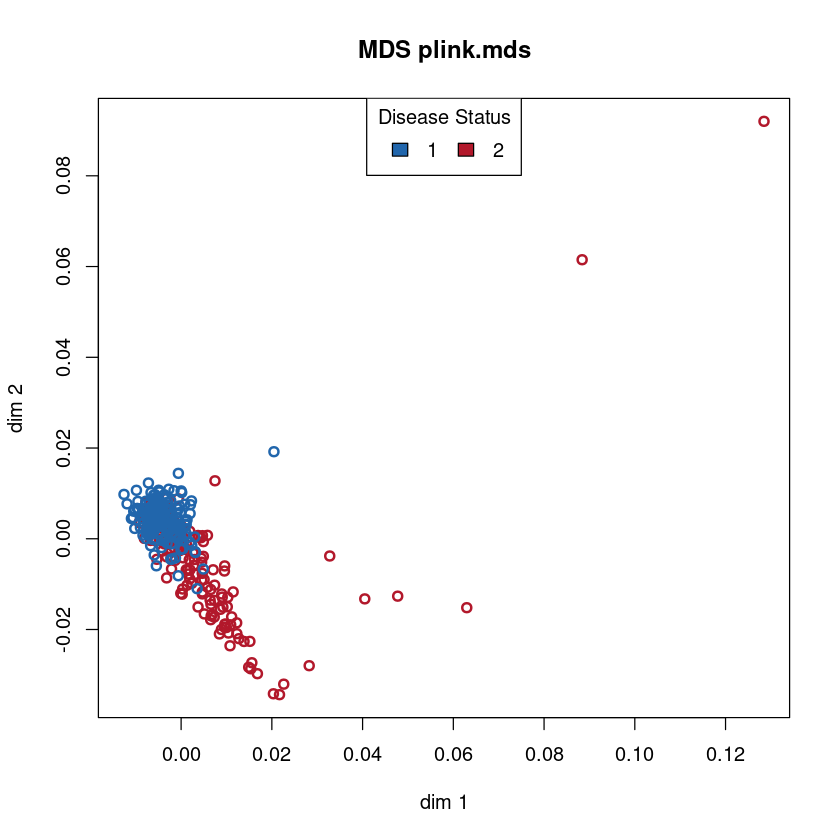

In [13]:
# source R function for plotting
source("/course/novo23/scripts/newPlotPlink.R")

# plot the results (plink.mds is the output file from plink)
plotPlink("~/plink.mds",fam="~/data/gwa.fam")

It shows the first two dimensions and each individual is represented by a point, which is colored according to the individual's disease status (1=control, 2=case).

Clustering of cases and controls seperately is an indication of batch bias. 
- Do you see such clustering? 
- What else could explain such clustering?

Let's try to fix the issue by filtering individuals and SNPs. We can remove many of the error prone SNPs and individuals by removing

- SNPs that are not in HWE (Hardy weinberg Equilibrium) (option --hwe)

- the rare SNPs (difficult to genotype and very error prone) (option --maf)

- SNPs with lots of missing data (why?) (option --geno)

**Try to redo the above MDS analysis by adding the additional filters**

--hwe 0.0001 --maf 0.05 --geno 0.05

which remove sites not in HWE (p-value 0.0001), low minor allele frequency (<5%), high genotype missingness (>5%) (do it by changing the code above and running it again).


- Can you now see differences between cases and controls?

Let us try to rerun an association analysis with these additional filters (and a new output name so we won't overwrite our old results). 


In [14]:
plink --bfile data/gwa --logistic --autosome --out assoc2 --hwe 0.0001 \
--maf 0.05 --mind 0.55 --geno 0.05 

PLINK v1.90b6 64-bit (26 May 2018)             www.cog-genomics.org/plink/1.9/
(C) 2005-2018 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to assoc2.log.
Options in effect:
  --autosome
  --bfile data/gwa
  --geno 0.05
  --hwe 0.0001
  --logistic
  --maf 0.05
  --mind 0.55
  --out assoc2

386829 MB RAM detected; reserving 193414 MB for main workspace.
488756 out of 499264 variants loaded from .bim file.
356 people (145 males, 211 females) loaded from .fam.
356 phenotype values loaded from .fam.
1 person removed due to missing genotype data (--mind).
ID written to assoc2.irem .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 355 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate in remaining samples i

Now try to plot the manhattan plot and the qqplot in R:

      CHR           SNP        BP TEST NMISS    OR         P
87321   4 SNP_A-1978655 119229342  ADD   338 3.913 5.114e-06


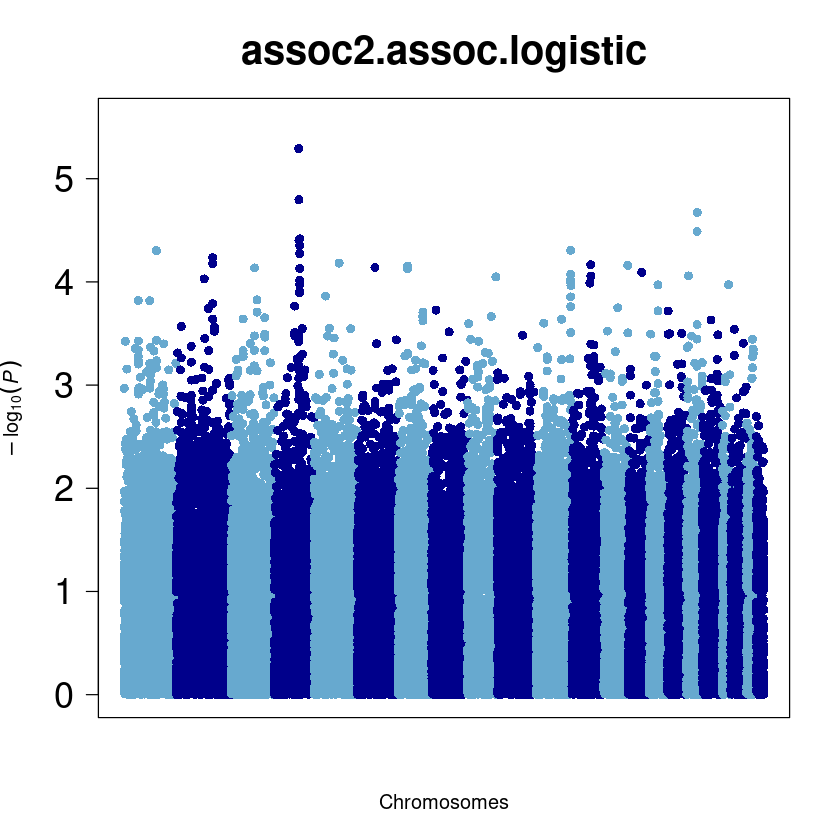

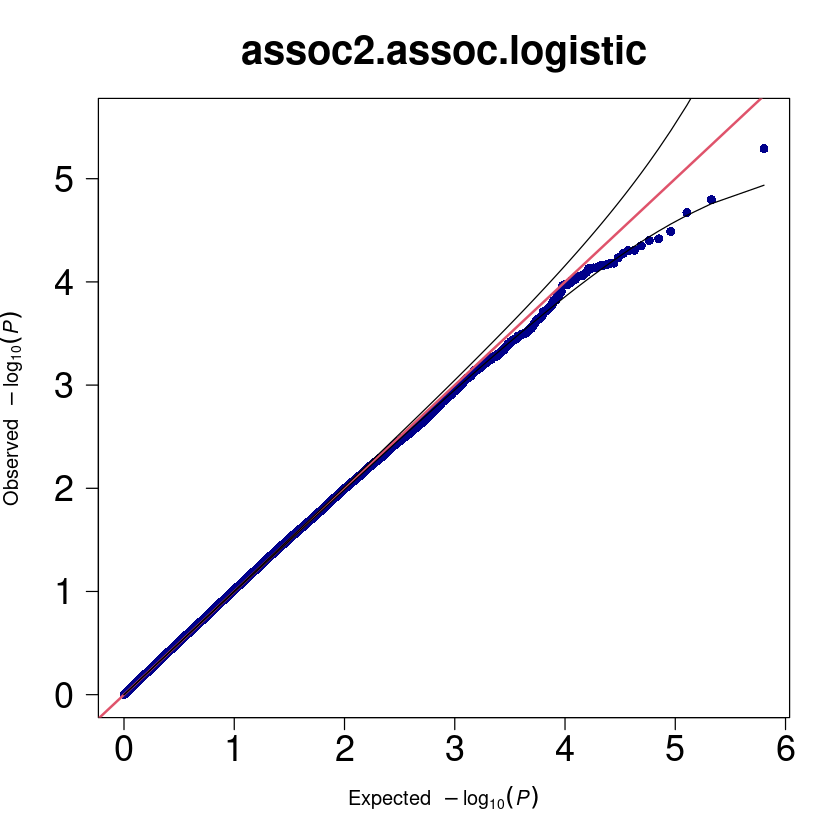

In [3]:
# source R function for plotting
source("/course/novo23/scripts/newPlotPlink.R")

# plot the results (plink.genome is the output file from plink)
# print out the SNP with a p-value lower than 1e-5 (0.00001)
plotPlink("~/assoc2.assoc.logistic",pval=1e-5)


- How does the QQ plot look now - any signs of inflation?
- How many genome wide significant SNPs?
- Information about the most significant SNPs is printed above the manhatten plot. Identify the chromosome, physical position (BP), Odds-ratio and SNP name. 


Let's try to plot the region with the most significant SNP in a 1 Mb window around this SNP:

In [ ]:
# read in data in R
source("/course/novo23/scripts/newPlotPlink.R")

# read in data in R
d<-read.table("~/assoc2.assoc.logistic",head=T,as.is=T)

# select sites to plot, 0.5Mb on either side of SNP
region <- subset(d,CHR==4 & BP > 119229342-5e5 &  BP < 119229342+5e5)

#plot
locusZoomNoLD(region$P,chr=4,pos=region$BP,main="LocusZoom")

By itself the above signal is not genome wide significant. 
- what would be the next step

Assuming the association signal is due to a single causal SNP
- How many good candidates for causal SNPs are there?
- Which gene is the most likely gene that is affected by the variant?
- How can we determine, which variant (and which gene) is the causal ones?

# Continue with the next exercise 
["Exercise 2 - Exploring summary stats"](2GWASsumstats.ipynb)